In [202]:
# !pip install tqdm

In [203]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
from  matplotlib import animation, rc
from matplotlib import patches as patches
import pandas as pd
import math
from tqdm import tqdm

In [204]:
# load data file
csv = pd.read_csv('Q1_data_cleaned.csv')
csv.rename(columns= {'Last_Update':'Date'}, inplace= True)
# csv.rename(columns= {'Long_':'Long'}, inplace= True) # no longer needed

csv

,Date,Country_Region,Province_State,Lat,Long,Confirmed,Recovered,Deaths
0,4/1/2020,Afghanistan,NaN,33.000000,65.000000,237.0,5.0,4.0
1,4/1/2020,Albania,NaN,41.153300,20.168300,259.0,67.0,15.0
2,4/1/2020,Algeria,NaN,28.033900,1.659600,847.0,61.0,58.0
3,4/1/2020,Andorra,NaN,42.506300,1.521800,390.0,10.0,14.0
4,4/1/2020,Angola,NaN,-11.202700,17.873900,8.0,1.0,2.0
5,4/1/2020,Antigua and Barbuda,NaN,17.060800,-61.796400,7.0,0.0,0.0
6,4/1/2020,Argentina,NaN,-38.416100,-63.616700,1054.0,248.0,28.0
7,4/1/2020,Armenia,NaN,40.069100,45.038200,571.0,31.0,4.0
8,4/1/2020,Australia,Australian Capital Territory,-35.473500,149.012400,84.0,8.0,1.0
9,4/1/2020,Australia,New South Wales,-33.868800,151.209300,2182.0,4.0,9.0


In [205]:
# Read the CSV data into a DataFrame
df = csv 
# Group data by country
grouped_data = df.groupby("Country_Region").agg({
    "Date": "last",
    "Confirmed": "sum",
    "Recovered": "sum",
    "Deaths": "sum",
    # Select the first Lat and Long for each country
    "Lat": "first",
    "Long": "first"
})

grouped_data = grouped_data.reset_index()

# Display the grouped data
print(grouped_data)

                       Country_Region      Date  Confirmed  Recovered  \
0                         Afghanistan  4/1/2020      237.0        5.0   
1                             Albania  4/1/2020      259.0       67.0   
2                             Algeria  4/1/2020      847.0       61.0   
3                             Andorra  4/1/2020      390.0       10.0   
4                              Angola  4/1/2020        8.0        1.0   
5                 Antigua and Barbuda  4/1/2020        7.0        0.0   
6                           Argentina  4/1/2020     1054.0      248.0   
7                             Armenia  4/1/2020      571.0       31.0   
8                           Australia  4/1/2020     4862.0      422.0   
9                             Austria  4/1/2020    10711.0     1436.0   
10                         Azerbaijan  4/1/2020      359.0       26.0   
11                            Bahamas  4/1/2020       21.0        1.0   
12                            Bahrain  4/1/2020    

In [206]:
invalid = []
i = 0
pd.options.mode.chained_assignment = None  # default='warn'
j=83
n0 = len(csv['Country_Region'])-1

while i < n0-j:
  # case where diff province but same country on same day
  if csv['Country_Region'][i]==csv['Country_Region'][i+j]:
    csv['Confirmed'][i] += csv['Confirmed'][i+j]
    csv['Deaths'][i] += csv['Deaths'][i+j]
    csv['Recovered'][i] += csv['Recovered'][i+j]
    invalid.append(i+j)
  i+=1

csv.drop(invalid, axis=0, inplace=True)
print("Invalid entries dropped.")


pd.options.display.max_rows = 4000
print(csv)

Invalid entries dropped.
         Date                    Country_Region  \
0    4/1/2020                       Afghanistan   
1    4/1/2020                           Albania   
2    4/1/2020                           Algeria   
3    4/1/2020                           Andorra   
4    4/1/2020                            Angola   
5    4/1/2020               Antigua and Barbuda   
6    4/1/2020                         Argentina   
7    4/1/2020                           Armenia   
8    4/1/2020                         Australia   
9    4/1/2020                         Australia   
10   4/1/2020                         Australia   
11   4/1/2020                         Australia   
12   4/1/2020                         Australia   
13   4/1/2020                         Australia   
14   4/1/2020                         Australia   
15   4/1/2020                         Australia   
16   4/1/2020                           Austria   
17   4/1/2020                        Azerbaijan   
18   4

In [207]:
# feature extraction from csv
dates = []
lats = []
longs = []
conf = []
rec = []
deaths = []
regions_all = []
regions = []

n0 = len(grouped_data)
csv = grouped_data
# removing discrepancies in data
for z in range(n0):
  # add data, making sure it is not deleted
  if z not in invalid and csv['Confirmed'][z] != -1 and csv['Recovered'][z] != -1 and csv['Deaths'][z] != -1:
    regions_all.append(csv['Country_Region'][z])
    dates.append(csv['Date'][z])
    lats.append(csv['Lat'][z].astype('float'))
    longs.append(csv['Long'][z].astype('float'))
    conf.append(csv['Confirmed'][z].astype('float'))
    rec.append(csv['Recovered'][z].astype('float'))
    deaths.append(csv['Deaths'][z].astype('float'))

# neural networks always tend to work better if the data is normalized:
mconf = max(conf)
mrec = max(rec)
mdeaths = max(deaths)
regions = list(dict.fromkeys(regions_all))

features_total = np.array([[conf[i]/mconf, rec[i]/mrec, deaths[i]/mdeaths, regions_all[i]] 
                     for i in range(len(regions_all))])

In [208]:
visualize_feature = features_total.copy()
# visualize_feature[:,1] =visualize_feature[:,1]/visualize_feature[:,0]
# visualize_feature[:,1] =visualize_feature[:,2]/visualize_feature[:,0]
# visualize_feature
features_total.shape

(187, 4)

In [209]:
for i in range(len(features_total)):
  for j in range(len(features_total[i])-1):
    if math.isnan(float(features_total[i][j])):
      features_total[i][j] = 0.0

In [210]:
# select features corresponding to a certain date

def getEntriesPerDate(date,features):
  print("Date selected:", date)
  idxs = []
  for i in range(len(dates)):
    if dates[i] != date:
      idxs.append(i)
  return np.delete(np.delete(features, 3, 1), idxs, 0).astype('float')

def getEntriesPerDate_country(date,features):
  print("Date selected:", date)
  idxs = []
  for i in range(len(dates)):
    if dates[i] != date:
      idxs.append(i)
  return np.delete(features, idxs, 0)

sel_date = dates[-8]
features_sel_date = getEntriesPerDate(sel_date,features_total)
features_sel_date = np.nan_to_num(features_sel_date)
feature_visual_select = getEntriesPerDate_country(sel_date,visualize_feature)
feature_visual_select = np.nan_to_num(feature_visual_select)

Date selected: 4/1/2020
Date selected: 4/1/2020


In [211]:
feature_visual_select_ratio = feature_visual_select.copy()

feature_visual_select_ratio[:,2] = feature_visual_select[:,2].astype('float')/feature_visual_select[:,0].astype('float')
feature_visual_select_ratio[:,1] = feature_visual_select[:,1].astype('float')/feature_visual_select[:,0].astype('float')

for i in range(len(feature_visual_select[:,2])):
    if feature_visual_select_ratio[i:0] == 0:
        feature_visual_select_ratio[i,2] = 0
        feature_visual_select_ratio[i,1] = 0    
        
feature_visual_select_ratio

C:\Users\NM TRADERS\AppData\Local\Temp\ipykernel_26728\3803569070.py:3: RuntimeWarning: invalid value encountered in divide
  feature_visual_select_ratio[:,2] = feature_visual_select[:,2].astype('float')/feature_visual_select[:,0].astype('float')
C:\Users\NM TRADERS\AppData\Local\Temp\ipykernel_26728\3803569070.py:4: RuntimeWarning: invalid value encountered in divide
  feature_visual_select_ratio[:,1] = feature_visual_select[:,1].astype('float')/feature_visual_select[:,0].astype('float')
C:\Users\NM TRADERS\AppData\Local\Temp\ipykernel_26728\3803569070.py:7: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if feature_visual_select_ratio[i:0] == 0:


array([['0.001110736179067544', '0.05891654979833482',
        '0.2737525799979793', 'Afghanistan'],
       ['0.0012138424910484974', '0.7224215399596593',
        '0.9393729941050353', 'Albania'],
       ['0.003969593011266708', '0.20112315476612197',
        '1.1106856448206093', 'Algeria'],
       ['0.0018277937123896294', '0.0716062682164377',
        '0.5822506797649329', 'Andorra'],
       ['3.749320435671035e-05', '0.34908055755513384',
        '4.054960091220068', 'Angola'],
       ['3.280655381212155e-05', '0.0', '0.0', 'Antigua and Barbuda'],
       ['0.004939729673996588', '0.6570928142214284',
        '0.43088759982604147', 'Argentina'],
       ['0.002676077460960201', '0.15161467298366582',
        '0.11362410062963414', 'Armenia'],
       ['0.02278649494779071', '0.2423891325187437',
        '0.0667208571159205', 'Australia'],
       ['0.050198713983090566', '0.3744036453359516',
        '0.22109015902086826', 'Austria'],
       ['0.0016825075455073769', '0.20225280214893

In [212]:
features_sel_date_ratio = features_sel_date.copy()
features_sel_date_ratio[:,2] = features_sel_date[:,2] /features_sel_date[:,0]  #recovered as a ratio of confirmed
features_sel_date_ratio[:,1] = features_sel_date[:,1] /features_sel_date[:,0]  #death as a ratio of confirmed

for i in range(len(features_sel_date_ratio[:,2])):
    if not features_sel_date_ratio[i,0]:
        features_sel_date_ratio[i,1] = 0
        features_sel_date_ratio[i,2] = 0
# for i in range(len(features_sel_date[:,1])):
#     print(f'{features_sel_date[i,0]}     {features_sel_date_ratio[i,0]}', end = '  ')
#     print(f'{features_sel_date[i,1]}     {features_sel_date_ratio[i,1]}', end = '  ')
#     print(f'{features_sel_date[i,2]}     {features_sel_date_ratio[i,2]}')

C:\Users\NM TRADERS\AppData\Local\Temp\ipykernel_26728\1654283579.py:2: RuntimeWarning: invalid value encountered in divide
  features_sel_date_ratio[:,2] = features_sel_date[:,2] /features_sel_date[:,0]  #recovered as a ratio of confirmed
C:\Users\NM TRADERS\AppData\Local\Temp\ipykernel_26728\1654283579.py:3: RuntimeWarning: invalid value encountered in divide
  features_sel_date_ratio[:,1] = features_sel_date[:,1] /features_sel_date[:,0]  #death as a ratio of confirmed


In [213]:
# bring lat and long to scale to figure out right size of SOM
lats = lats + abs(min(lats))
longs = longs + abs(min(lats))
scale_fact = 10
net_dimx = max(lats)//scale_fact
net_dimy = max(longs)//scale_fact
net_dimx, net_dimy

(12.0, 17.0)

In [214]:
csv.loc[csv['Country_Region']=='Australia']

,Country_Region,Date,Confirmed,Recovered,Deaths,Lat,Long
8,Australia,4/1/2020,4862.0,422.0,20.0,-35.4735,149.0124


In [215]:
# Reducing 
csv
csv.loc[csv['Country_Region']=='Australia']
# csv.set_index('Country_Region', inplace=True)
# csv.loc[(csv.index=='Austrailia')]


,Country_Region,Date,Confirmed,Recovered,Deaths,Lat,Long
8,Australia,4/1/2020,4862.0,422.0,20.0,-35.4735,149.0124


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


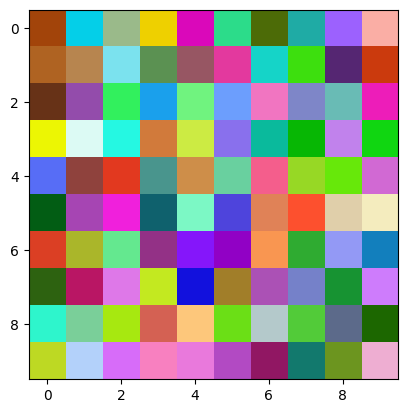

<Figure size 640x480 with 0 Axes>

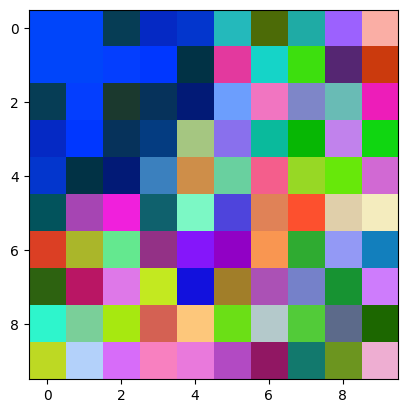

In [216]:
from typing import Union
from typing import List
import matplotlib.colors as colors

cblues = ['thistle', 'violet', 'mediumorchid',
          'darkviolet', 'royalblue', 'blue',
          'navy', 'lime', 'limegreen',
          'darkgreen']
cmap = colors.ListedColormap(cblues)


class SOM():
    def __init__(self, size :List[int],
                 learning_rate :float, 
                 init_radius: float, 
                 dimension:int, 
                 iterations:int,
                 Training_data,
                 seed: int = 0  ):
        self.rng = np.random.default_rng(seed)
        size.append(dimension) 
        self.size = np.array(size)
        self.Network = self.rng.random(size)
        self.learning_rate = learning_rate
        self.init_raduis = init_radius
        self.init_learning_rate = learning_rate
        self.radius = init_radius
        self.iterations = iterations
        self.Training_data = Training_data
        self.time_constant = iterations / np.log(init_radius)
        return
    def BMU(self, X):
        '''
        Input:
        X: Input vector
        Returns:
        (BMU, idx): The neuron and index
        '''
        dist = self.manhattan_distance(self.Network, X)
        # print(dist.shape)
        assert dist.shape == self.Network.shape[:-1]
        BMU_idx = np.argwhere(dist == dist.min())[0]

        return self.Network[BMU_idx[0],BMU_idx[1],:]
    
    def update_neurons(self,X, curr_neuron, winining_neuron):
        neighborhood = self.neighborhood(curr_neuron,winining_neuron)
        return curr_neuron + self.learning_rate * neighborhood*(X- curr_neuron)
    
    def neighborhood(self,curr_neuron, wining_neuron):
        return np.exp(-0.5*(self.manhattan_distance(curr_neuron,wining_neuron))**2/self.radius**2) 
    
    def manhattan_distance(self,v1:np.ndarray,v2:np.ndarray):
        abs_diff = v1-v2
        abs_diff = abs_diff**2
        return np.sum(abs_diff, axis = -1)**0.5
    
    def lr_scheduler(self, i :int):
        self.learning_rate =  self.init_learning_rate * np.exp(-i/self.iterations)


    def decay_radius(self, i :int):
        self.radius = self.init_raduis * np.exp(-i/self.iterations)


    def train(self):
        n = self.Training_data.shape[0]
        # print(n)
        sampler = np.random.randint(0, n, size=self.iterations)
        fig = plt.figure()
        for it in range(self.iterations):
            X = self.Training_data[sampler[it],:]
       
            bmu = self.BMU(X)

            # decay the SOM parameters
            self.decay_radius(it)
            self.lr_scheduler(it)

            for J in range(self.size[0]*self.size[1]):
                k = J//self.size[0]
                l = J%self.size[1]
                curr_neuron = self.Network[k,l,:]
      
                if k**2 + l**2 <= self.radius**2:            
                    self.Network[k,l,:] = self.update_neurons(X,curr_neuron, bmu)
                    assert self.Network[k,l,:].shape == curr_neuron.shape

        return self.Network


# Meta data
N = 10
size_SOM = N*N
Init_learning_rate = 0.2
initial_radius = N/2       

# size = [int(net_dimx), int(net_dimy)]
size = [10,10]
TrainingData = features_sel_date_ratio
som =SOM(size, learning_rate=Init_learning_rate, 
    init_radius=initial_radius,
    dimension=features_sel_date.shape[1],
    Training_data=TrainingData, iterations=10000)
plt.figure()
# output = np.sum(som.Network, axis = 2)
plt.imshow(som.Network)#,animated=True, cmap=cmap, norm=norm)
som.train()
plt.figure()
# output = np.sum(som.Network, axis = 2)
plt.imshow(som.Network)#,animated=True, cmap=cmap, norm=norm)


# print(f'The shape of the SOM lattice = {som.Network.shape}')
# plt.imshow(som.Network)

        
    

Visualizing with a Map


In [217]:
lst = feature_visual_select_ratio
for i in range(len(lst)):
    for j in range(len(lst[i])):
        if lst[i][j] =='nan':
            lst[i][j] = 0.0

lst


array([['0.001110736179067544', '0.05891654979833482',
        '0.2737525799979793', 'Afghanistan'],
       ['0.0012138424910484974', '0.7224215399596593',
        '0.9393729941050353', 'Albania'],
       ['0.003969593011266708', '0.20112315476612197',
        '1.1106856448206093', 'Algeria'],
       ['0.0018277937123896294', '0.0716062682164377',
        '0.5822506797649329', 'Andorra'],
       ['3.749320435671035e-05', '0.34908055755513384',
        '4.054960091220068', 'Angola'],
       ['3.280655381212155e-05', '0.0', '0.0', 'Antigua and Barbuda'],
       ['0.004939729673996588', '0.6570928142214284',
        '0.43088759982604147', 'Argentina'],
       ['0.002676077460960201', '0.15161467298366582',
        '0.11362410062963414', 'Armenia'],
       ['0.02278649494779071', '0.2423891325187437',
        '0.0667208571159205', 'Australia'],
       ['0.050198713983090566', '0.3744036453359516',
        '0.22109015902086826', 'Austria'],
       ['0.0016825075455073769', '0.20225280214893

In [218]:
# !pip install --upgrade geopandas

In [219]:

import geopandas

# countries = geopandas.read_file('Countries_WGS84.shp')

In [220]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

C:\Users\NM TRADERS\AppData\Local\Temp\ipykernel_26728\3939914640.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))


In [221]:
vectors = lst[:,:-1]

# x = vectors[0][0:3]
# x
color =som.BMU(vectors.astype(np.float32)[0])
country_colors = {}
for i in range(len(vectors)):
    country_colors[lst[i][3]] = som.BMU(vectors.astype(np.float32)[i])

country_colors


{'Afghanistan': array([0.0044333 , 0.19976901, 0.27120448]),
 'Albania': array([0.08401534, 0.83264415, 0.78709831]),
 'Algeria': array([9.43849192e-04, 2.16614132e-01, 1.16425431e+00]),
 'Andorra': array([0.00883888, 0.10437763, 0.46445538]),
 'Angola': array([9.43849424e-04, 2.16614157e-01, 1.16425432e+00]),
 'Antigua and Barbuda': array([0.1080473 , 0.22381318, 0.18101994]),
 'Argentina': array([0.07374101, 0.47616696, 0.42853961]),
 'Armenia': array([0.1080473 , 0.22381318, 0.18101994]),
 'Australia': array([0.1080473 , 0.22381318, 0.18101994]),
 'Austria': array([0.0095415 , 0.32689114, 0.36251214]),
 'Azerbaijan': array([0.0044333 , 0.19976901, 0.27120448]),
 'Bahamas': array([0.02345162, 0.16217154, 0.77069942]),
 'Bahrain': array([0.23936944, 0.87648423, 0.05856803]),
 'Bangladesh': array([0.18294332, 0.96301914, 0.80091704]),
 'Barbados': array([0.1080473 , 0.22381318, 0.18101994]),
 'Belarus': array([0.0660825 , 0.84131728, 0.06669001]),
 'Belgium': array([0.00284694, 0.27365

C:\Users\NM TRADERS\AppData\Local\Temp\ipykernel_26728\3300826223.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if country[1][2] == 'United States of America':
C:\Users\NM TRADERS\AppData\Local\Temp\ipykernel_26728\3300826223.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  color_column.append(tuple(country_colors.get(country[1][2], (0,0,0))))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,colors
0,8.899530e+05,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...","(0.10804729709295106, 0.22381317702613127, 0.1..."
1,5.800546e+07,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...","(0.023451624141472668, 0.1621715352099988, 0.7..."
2,6.032530e+05,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...","(0.10804729709295106, 0.22381317702613127, 0.1..."
3,3.758926e+07,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...","(0.10804729709295106, 0.22381317702613127, 0.1..."
4,3.282395e+08,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...","(0.9949173481609178, 0.3159435453677002, 0.182..."
5,1.851393e+07,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...","(0.10804729709295106, 0.22381317702613127, 0.1..."
6,3.358065e+07,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...","(0.004433295188338935, 0.19976901022924454, 0...."
7,8.776109e+06,Oceania,Papua New Guinea,PNG,24829,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...","(0.10804729709295106, 0.22381317702613127, 0.1..."
8,2.706256e+08,Asia,Indonesia,IDN,1119190,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...","(0.0009438494244711237, 0.21661415730714892, 1..."
9,4.493871e+07,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...","(0.07374101339780592, 0.4761669632169956, 0.42..."


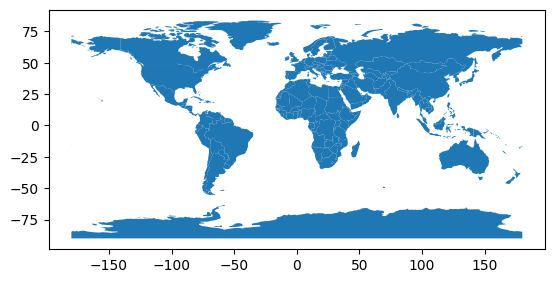

In [223]:
world.plot()

# ax = world.plot(color = 'gray')
type(world)

# world['colors'][0] = [0,0,0]
color_column = []
for country in world.iterrows():
    if country[1][2] == 'United States of America':
        color_column.append(tuple(country_colors['US']))
    else:
        color_column.append(tuple(country_colors.get(country[1][2], (0,0,0))))
color_column

world['colors'] = color_column
world


In [224]:
for country in world.iterrows():
    if country[1][6] == (0,0,0):
        print(country[1][2])

for country in world.iterrows():
    print(country[1][6])
    break
country_colors['US']

Dem. Rep. Congo
Fr. S. Antarctic Lands
Lesotho
Puerto Rico
Vanuatu
Myanmar
North Korea
Tajikistan
Turkmenistan
Solomon Is.
Antarctica
Cyprus
Somaliland
(0.10804729709295106, 0.22381317702613127, 0.18101993580847411)


C:\Users\NM TRADERS\AppData\Local\Temp\ipykernel_26728\4265957308.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if country[1][6] == (0,0,0):
C:\Users\NM TRADERS\AppData\Local\Temp\ipykernel_26728\4265957308.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(country[1][2])
C:\Users\NM TRADERS\AppData\Local\Temp\ipykernel_26728\4265957308.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(country[1][6])


array([0.99491735, 0.31594355, 0.18271238])

<Axes: >

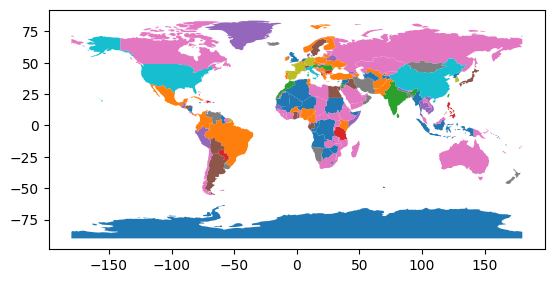

In [225]:
world.plot(column = 'colors')